In [1]:
# Librerías de Uso
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix  # Validación

In [2]:
df = pd.read_csv('../data/BankNote_Authentication.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '../data/BankNote_Authentication.csv'

In [ ]:
#Variable Objetivo (Target) - Class, se contabilizan por tipos

df['class'].value_counts() 

0    762
1    610
Name: class, dtype: int64

In [ ]:
#Se definen variables de entrada y variables de salida

y = df['class']  # Variable de Salida
X = df.drop(columns = ['class'])  #Se elimina la variable de Salida

# Se dividen los conjuntos de entrenamiento 80% - Entrenamiento, 20% - Pruebas

from sklearn.model_selection import train_test_split   # LLamar librería de entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)


In [ ]:
#LLamar librería de ML - Modelo RL

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression() # Generar Modelo de ML vacío

LR.fit(X_train,y_train) #  Entrenar modelo con datos ( 80 %)

y_pred = LR.predict(X_test) #  Utilizar modelo de entrenamiento para predecir Dataset de Pruebas (20 %)

C:\Users\Reyma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
comp_t = pd.DataFrame({'Test': y_test})
comp_t.reindex(method='bfill')
comp_t.index = range(comp_t.shape[0])
comp_p = pd.DataFrame({'Pred': y_pred})

#print(comp_t,round(comp_p,1))

comp = pd.merge(comp_t,comp_p,left_index=True, right_index=True)
comp



,Test,Pred
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


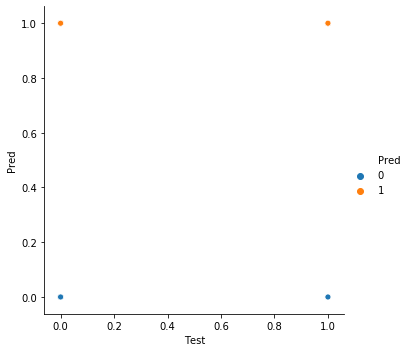

In [ ]:
# Graficar Datos Prueba vs Datos Predictivos
import seaborn as sns

sns.relplot(x='Test',y='Pred',data=comp, hue="Pred")
#sns.displot(x='Test',y='Pred',data=comp, hue="Pred")

In [ ]:
#Crear Matríz de Confusión

cmatrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

array([[166,   5],
       [  1, 103]], dtype=int64)

In [ ]:
#Extraer valores de Matriz de Confusión

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  166
False Positives:  5
False Negatives:  1
True Positives:  103


In [ ]:
#Accuracy (%) 

Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 

print("Accuracy {:0.2f}%".format(Accuracy))

Accuracy 97.82%


In [ ]:
#Precision 

Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Precision 0.95


In [ ]:
#Specificity 

Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.97


In [ ]:
# Instalar scikit-plot 

conda install -c conda-forge scikit-plot

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Reyma\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - scikit-plot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.11.8  |       h5b45459_0         183 KB  conda-forge
    certifi-2020.11.8          |   py37h03978a9_0         150 KB  conda-forge
    conda-4.9.2                |   py37h03978a9_0         3.0 MB  conda-forge
    matplotlib-base-3.1.3      |   py37h2981e6d_0         6.5 MB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    scikit-plot-0.3.7          |             py_1          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.9 MB

The following NEW packages will be INSTALLED:

  matplotlib-base    conda-for

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\Reyma\AppData\Local\Continuum\anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.  Please remove this file manually (you may need to reboot to free file handles)


C:\Users\Reyma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


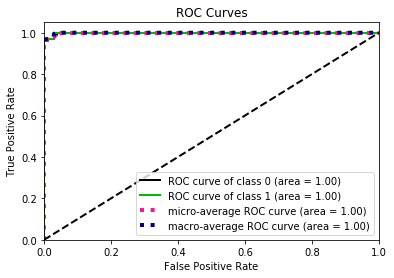

In [ ]:
#ROC (Receiver Operating Characteristic curve)

# Importar gráfico

import scikitplot as skplt

y_pred_proba = LR.predict_proba(X_test)  #enviar prueba

skplt.metrics.plot_roc_curve(y_test, y_pred_proba) # comparar prueba_predicción vs prueba_entrenamiento

plt.show()
